In [53]:
import warnings
warnings.filterwarnings('ignore')

## EDA : Exploratory Data Analysis:

**Exploratory data analysis (EDA)** is a term for certain kinds of initial analysis and findings done with data sets, usually early on in an analytical process. Some experts describe it as “taking a peek” at the data to understand more about what it represents and how to apply it. Exploratory data analysis is often a precursor to other kinds of work with statistics and data.

Professionals will often use various visual tools to do exploratory data analysis, for example, to test an intuitive hypothesis, and figure out in what ways data sets are similar or different. One excellent example is the use of a scatter plot graph – this simple bit of exploratory data analysis can show analysts whether there is a trend or major difference between two or more data sets, by making numbers, which are relatively hard for the human brain to analyze as a whole, into easy visuals. Block graphs and line graphs are other examples of this type of quick exploratory analysis. Those who are working with the data can expedite the process of figuring out what the data means, what it can be used for, and what conclusions can be drawn from it.

### The steps involved in the Data Science Project are:
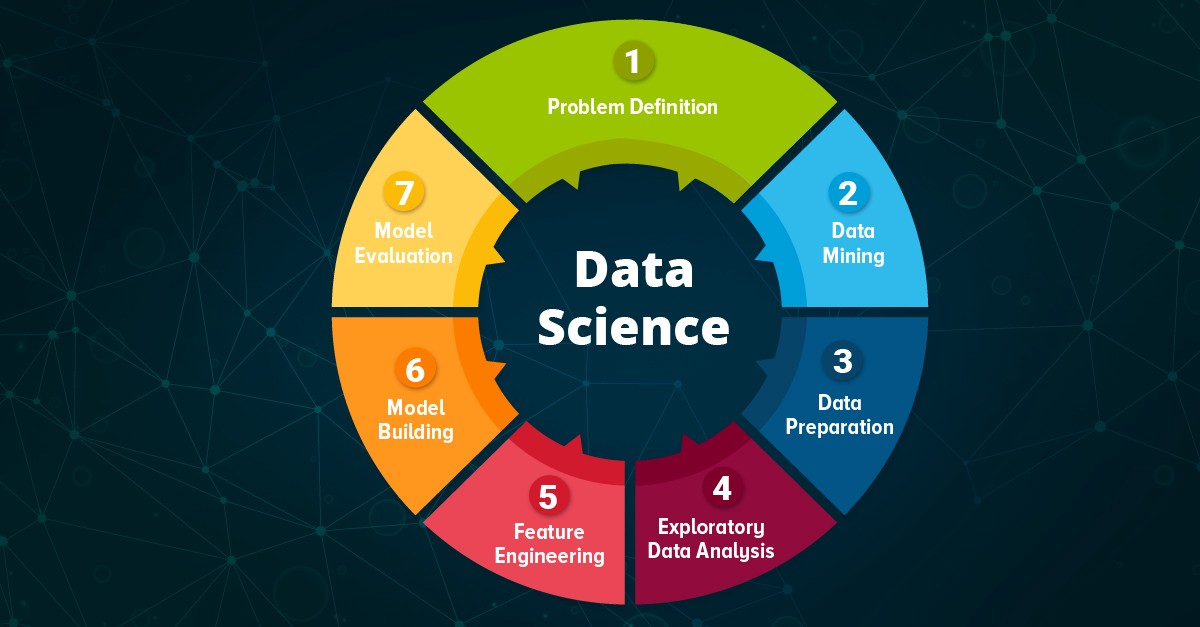

***This Notebook is all about the EDA and how to extract the information from the data given*** 

In [1]:
# Importing the impotant modules required :
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import chi2
from scipy.stats import chi2_contingency

## Description about the data
The dataset was released by Aspiring Minds from the Aspiring Mind Employment Outcome 2015 (AMEO). The study is primarily limited  only to students with engineering disciplines. The dataset contains the employment outcomes of engineering graduates as dependent variables (Salary, Job Titles, and Job Locations) along with the standardized scores from three different areas – cognitive skills, technical skills and personality skills. The dataset also contains demographic features. The dataset  contains  around  40 independent variables and 4000 data points. The independent variables are both continuous and categorical in nature. The dataset contains a unique identifier for each candidate. Below mentioned table contains the details for the original dataset. 

|Features(Column name)||Datatype||Description|
|---------------------||--------||-----------|
|ID||UID||A unique ID to identify a candidate|
|Salary||Continuous||Annual CTC oﬀered to the candidate (in INR)|
|DOJ||Date||Date of joining the company|
|DOL||Date||Date of leaving the company|
|Designation||Categorical||Designation offered in the job|
|JobCity||Categorical||Location of the job (city)|
|Gender||Categorical||Candidate’s gender|
|DOB||Date||Date of birth of candidate|
|10percentage||Continuous||Overall marks obtained in grade 10th examinations|
|10board||Categorical||The school board whose curriculum the candidate followed in grade 10|
|12graduation||Date||Year of graduation - senior year high school|
|12percentage||Continuous||Overall marks obtained in grade 12 examinations|
|12board||Date||The school board whose curriculum the candidate followed in grade 12|
|CollegeID||NA/ID||Unique ID identifying the college which the candidate attended||
|CollegeTier||Categorical||Tier of college|
|Degree||Categorical||Degree obtained/pursued by the candidate|
|Specialization||Categorical||Specialization pursued by the candidate|
|CollegeGPA||Continuous||Aggregate GPA at graduation|
|CollegeCityID||NA/ID||A unique ID to identify the city in which the college is located in|
|CollegeCityTier||Categorical||The tier of the city in which the college is located|
|CollegeState||Categorical||Name of States|
|GraduationYear||Date||Year of graduation (Bachelor’s degree)|
|English||Continuous||Scores in AMCAT English section|
|Logical||Continuous||Scores in AMCAT Logical section|
|Quant||Continuous||Scores in AMCAT Quantitative section|
|Domain||Continuous/ Standardized||Scores in AMCAT’s domain module|
|ComputerProgramming||Continuous||Score in AMCAT’s Computer programming section|
|ElectronicsAndSemicon||Continuous||Score in AMCAT’s Electronics & Semiconductor Engineering section|
|ComputerScience||Continuous||Score in AMCAT’s Computer Science section|
|MechanicalEngg||Continuous||Score in AMCAT’s Mechanical Engineering section|
|ElectricalEngg||Continuous||Score in AMCAT’s Electrical Engineering section|
|TelecomEngg||Continuous||Score in AMCAT’s Telecommunication Engineering section|
|CivilEngg||Continuous||Score in AMCAT’s Civil Engineering section|
|conscientiousness||Continuous/ Standardized||Scores in one of the sections of AMCAT’s personality test|
|agreeableness||Continuous/Standardized||Scores in one of the sections of AMCAT’s personality test|
|extraversion||Continuous/ Standardized||Scores in one of the sections of AMCAT’s personality test|
|neuroticism||Continuous/Standardized||Scores in one of the sections of AMCAT’s personality test|
|openess_to_experience||Continuous/ Standardized||Scores in one of the sections of AMCAT’s personality test|









































In [2]:
# import dataset
df = pd.read_excel("aspiring_minds_employability_outcomes_2015.xlsx")

In [3]:
df.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [4]:
df['ID'].unique()

array([203097, 579905, 810601, ..., 355888, 947111, 324966], dtype=int64)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,3998.0,663794.540520,363218.245829,11244.0000,334284.250000,639600.000000,990480.000000,1.298275e+06
Salary,3998.0,307699.849925,212737.499957,35000.0000,180000.000000,300000.000000,370000.000000,4.000000e+06
10percentage,3998.0,77.925443,9.850162,43.0000,71.680000,79.150000,85.670000,9.776000e+01
12graduation,3998.0,2008.087544,1.653599,1995.0000,2007.000000,2008.000000,2009.000000,2.013000e+03
12percentage,3998.0,74.466366,10.999933,40.0000,66.000000,74.400000,82.600000,9.870000e+01
CollegeID,3998.0,5156.851426,4802.261482,2.0000,494.000000,3879.000000,8818.000000,1.840900e+04
CollegeTier,3998.0,1.925713,0.262270,1.0000,2.000000,2.000000,2.000000,2.000000e+00
collegeGPA,3998.0,71.486171,8.167338,6.4500,66.407500,71.720000,76.327500,9.993000e+01
CollegeCityID,3998.0,5156.851426,4802.261482,2.0000,494.000000,3879.000000,8818.000000,1.840900e+04
CollegeCityTier,3998.0,0.300400,0.458489,0.0000,0.000000,0.000000,1.000000,1.000000e+00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     3998 non-null   int64         
 1   Salary                 3998 non-null   int64         
 2   DOJ                    3998 non-null   datetime64[ns]
 3   DOL                    3998 non-null   object        
 4   Designation            3998 non-null   object        
 5   JobCity                3998 non-null   object        
 6   Gender                 3998 non-null   object        
 7   DOB                    3998 non-null   datetime64[ns]
 8   10percentage           3998 non-null   float64       
 9   10board                3998 non-null   object        
 10  12graduation           3998 non-null   int64         
 11  12percentage           3998 non-null   float64       
 12  12board                3998 non-null   object        
 13  Col

In [7]:
df.isnull().sum()

ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
o

In [8]:
cat_cols=df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(numerical_cols)

Categorical Variables:
Index(['DOL', 'Designation', 'JobCity', 'Gender', '10board', '12board',
       'Degree', 'Specialization', 'CollegeState'],
      dtype='object')
Numerical Variables:
['ID', 'Salary', '10percentage', '12graduation', '12percentage', 'CollegeID', 'CollegeTier', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier', 'GraduationYear', 'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience']


In [9]:
# remove of some col from numerical which are date and time and not useful for analysis:
remove = ['GraduationYear', 'CollegeCityTier', 'CollegeCityID', 'CollegeID', 'ID', 'CollegeTier', '12graduation']
num_cols = [elt for elt in numerical_cols if elt not in remove]

In [10]:
num_cols

['Salary',
 '10percentage',
 '12percentage',
 'collegeGPA',
 'English',
 'Logical',
 'Quant',
 'Domain',
 'ComputerProgramming',
 'ElectronicsAndSemicon',
 'ComputerScience',
 'MechanicalEngg',
 'ElectricalEngg',
 'TelecomEngg',
 'CivilEngg',
 'conscientiousness',
 'agreeableness',
 'extraversion',
 'nueroticism',
 'openess_to_experience']

So there are no null or missing values in the giving data.


***So from the data description given we can see that:***

***Categorical Columns are: --  Designation, JobCity, Gender, CollegeTier, Degree, Specialization, CollegeCityTier, CollegeState, 10board, 12board***

***Numerical Columns(continuous) are :  --  Salary, 10percentage, 12percentage, CollegeGPA, English, Logical, Quant, Domain, ComputerProgramming, ElectronicsAndSemicon, ComputerScience, MechanicalEngg, ElectricalEngg, TelecomEngg, CivilEngg, conscientiousness, agreeableness, extraversion, neuroticism, openess_to_experience***

## Univariate Data Analysis( Categorical Columns):
For the categorical data we can either go with the **countplot** or with the **pie chart**. We should analyse those data with a feasible amount of categories so that we can conclude some of the results based on that:



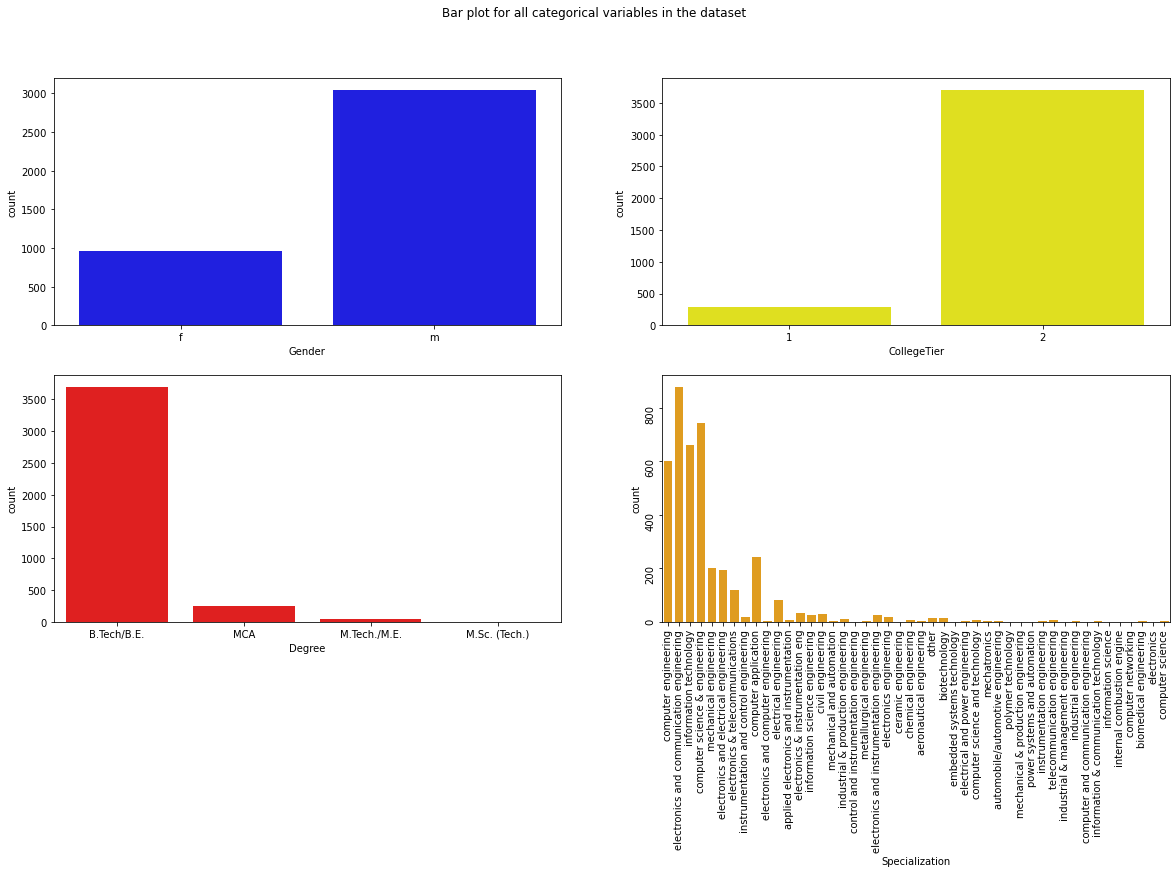

In [11]:
fig, axes = plt.subplots(2, 2, figsize = (20, 10))
fig.suptitle('Bar plot for all categorical variables in the dataset')
sns.countplot(ax = axes[0, 0], x = df['Gender'], color = 'blue')
sns.countplot(ax = axes[0, 1], x = df['CollegeTier'], color = 'yellow')
sns.countplot(ax = axes[1, 0], x = df['Degree'], color = 'red')
sns.countplot(ax = axes[1, 1], x = df['Specialization'], color = 'orange')
axes[1][1].tick_params(labelrotation=90);


Text(0.5, 0, 'College Tier')

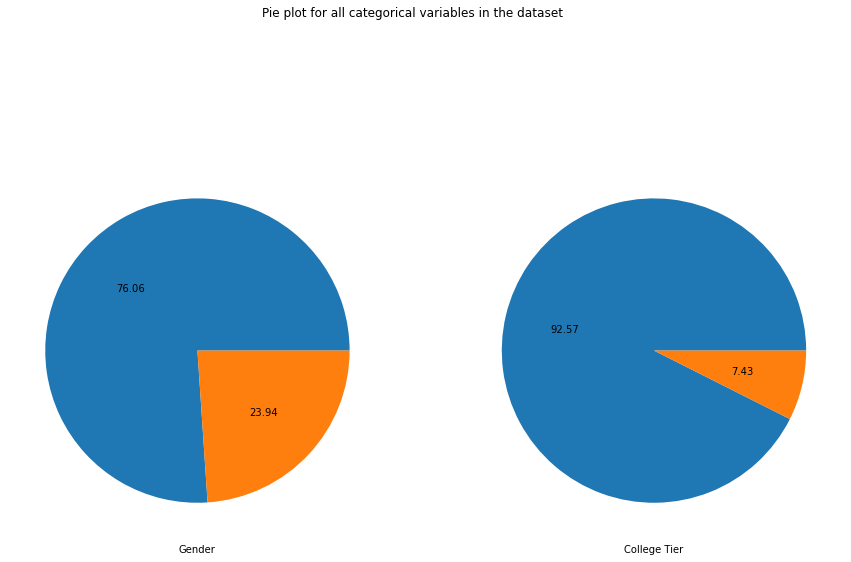

In [12]:
#  we can visualize the same through pie chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 10))
fig.suptitle('Pie plot for all categorical variables in the dataset')
ax1.pie(x = df['Gender'].value_counts(), autopct = '%.2f');
ax1.set_xlabel(xlabel = 'Gender')
ax2.pie(x = df['CollegeTier'].value_counts(), autopct = '%.2f');
ax2.set_xlabel(xlabel = 'College Tier')

### Conclusion:
* The male students are more divoted towards the Engineering than that of Female students.About 76% of male and 24% female
* Most of the students belongs to Tier 2 colleges than Tier 1 colleges that shows how much its dificult to get one of the tier 1 college. 93% of students are from tier 2 colleges
* Most of the students that are persuing Btech go towards the jobs after completion and a very less percentage of students tend to go for higher education like Mtech and MCA and after that join the job
* Most of the students in the Engineering domain are in the IT sector because of the Oppurtunity provided in the field than that of core branches and we can see in todays senario that most of the core branch students are also shifting towards the IT jobs.

## Univariate Data Analysis( Numerical Columns):
For the Numerical  data we can either go with the **Histplot**, with the **distplot** or we can go with **Boxplot**. 


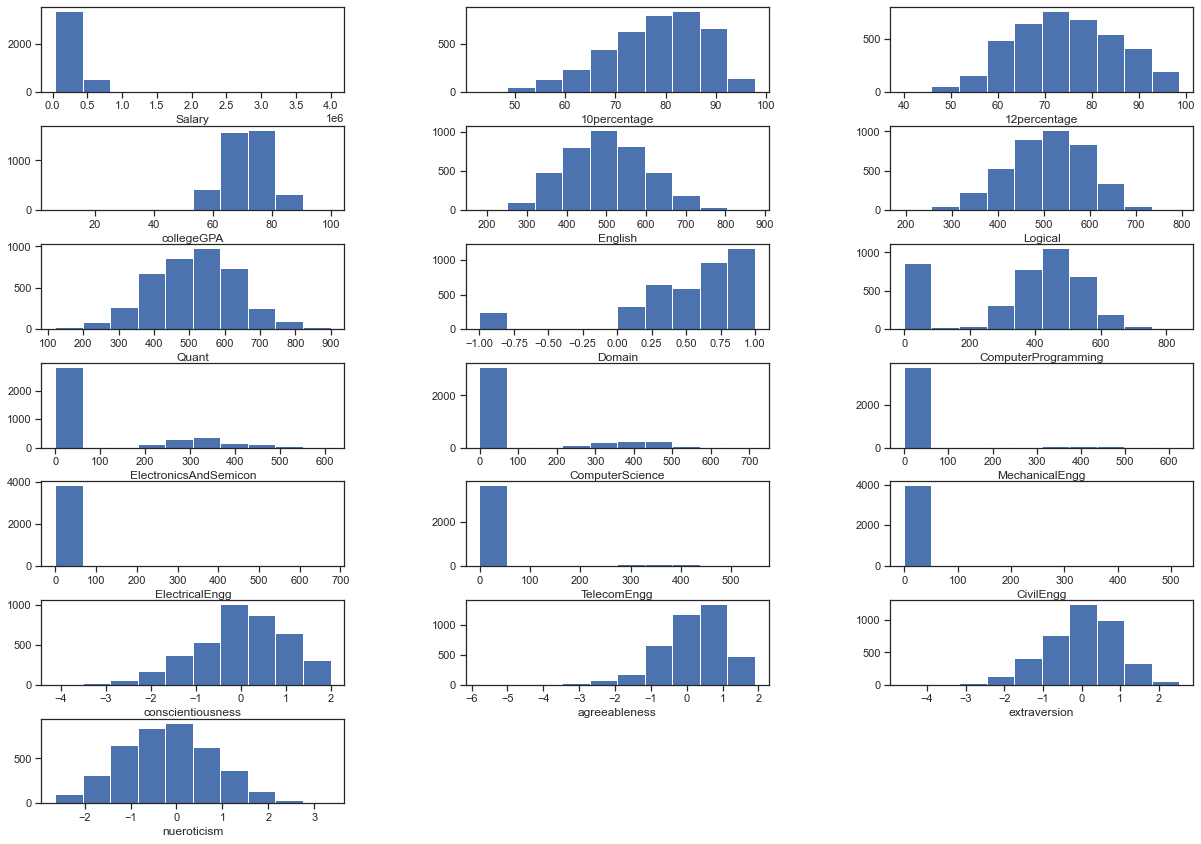

In [84]:
plt.figure(figsize = (20, 20))
for i, col in enumerate(num_cols[:-1]):
    plt.subplot(10, 3, i+1)
    plt.hist(df[col])
    plt.xlabel(col)
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()


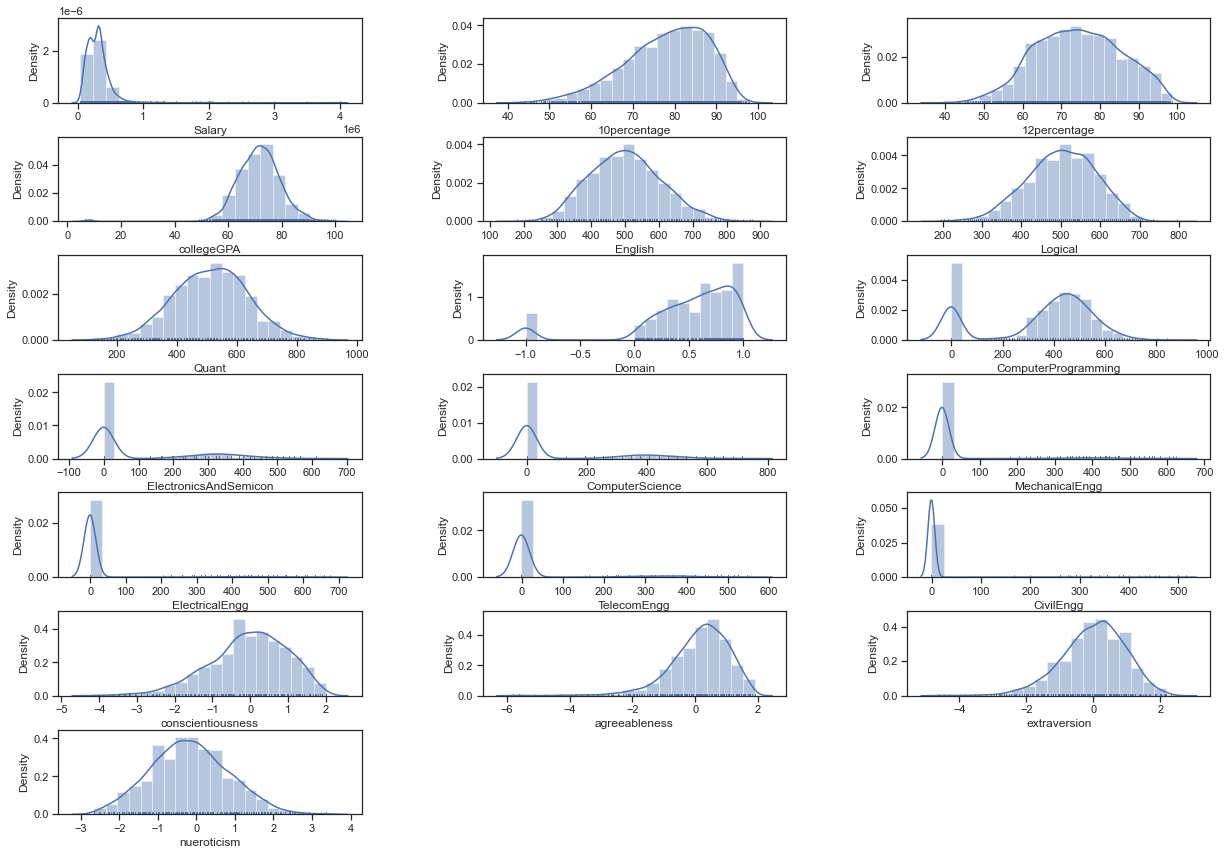

In [82]:
# Distribution plot (pdf for continuous functions)
plt.figure(figsize = (20, 20))
for i, col in enumerate(num_cols[:-1]):
    plt.subplot(10, 3, i+1)
    sns.distplot(df[col], bins = 20, kde = True, rug = True)
    plt.xlabel(col)
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

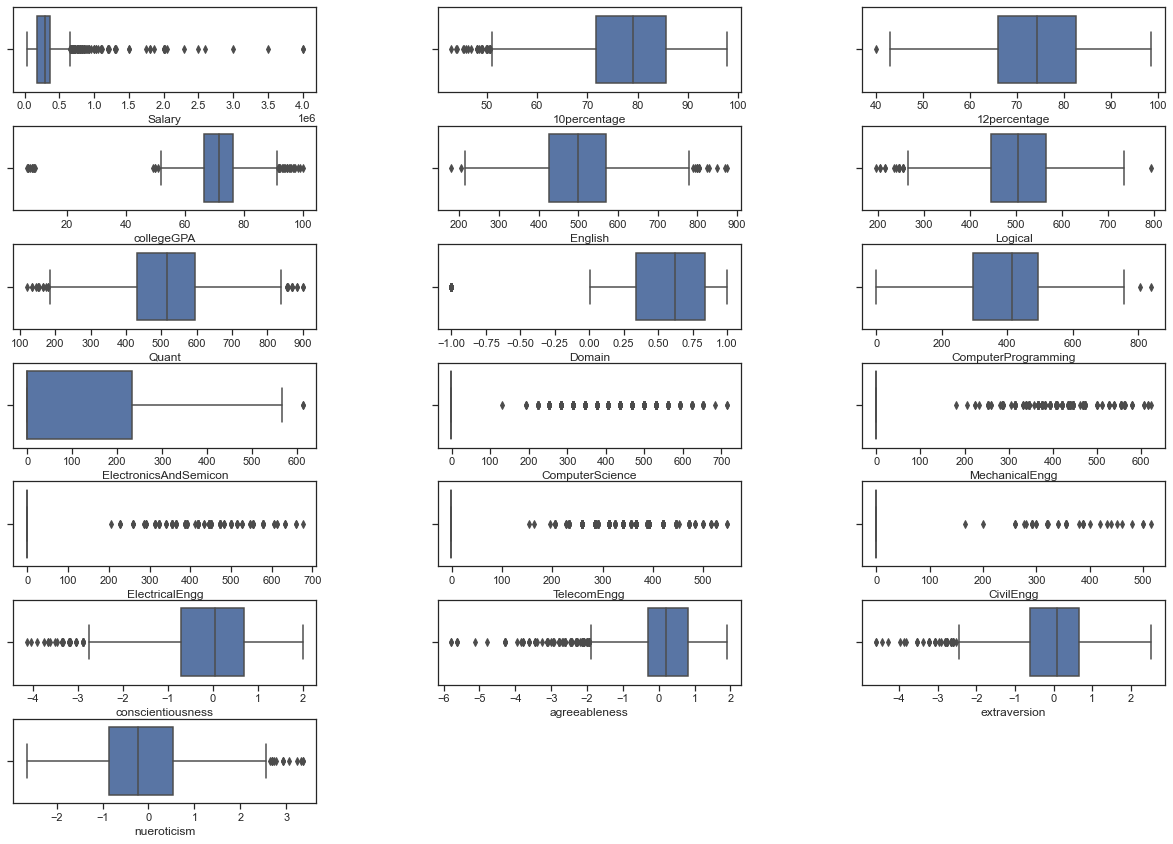

In [85]:
plt.figure(figsize = (20, 20))
for i, col in enumerate(num_cols[:-1]):
    plt.subplot(10, 3, i+1)
    sns.boxplot(df[col])
    plt.xlabel(col)
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()


In [15]:
for col in num_cols:
    print(col)
    print(df[col].skew())

Salary
6.451081166224832
10percentage
-0.5910185081648047
12percentage
-0.03260741437482245
collegeGPA
-1.2492091640381637
English
0.1919970174188361
Logical
-0.21660181091305136
Quant
-0.01939903459277611
Domain
-1.9221455634359381
ComputerProgramming
-0.7781056485649357
ElectronicsAndSemicon
1.1959748726431938
ComputerScience
1.529520866328104
MechanicalEngg
4.029563440339185
ElectricalEngg
5.060407240676985
TelecomEngg
3.041260613001428
CivilEngg
10.315681229498226
conscientiousness
-0.5270033403119503
agreeableness
-1.2049152493551414
extraversion
-0.5232667810368843
nueroticism
0.16570968491563792
openess_to_experience
-1.5069620137292778


## Conclusion:
* Most of the people have salary in lower range and very few people have salary of higher range of 40lakhs so the people with higher valiue of salary becomes ouliers in the case as shown by the box plot we can also see the skewness is very high.
* The students are having a score of 80 to 90 percentage in the 10 class examination and for 12 class the average is dropped to 70 to 80 percentage
* The college GPA is between 60 to 80 percentage and very few people have GPA greater than 80 percentage
* Most of the people have scored averge score in english, quant, logic, computerProgramming and very less people have scored less then the average and higher than average.
* in the domain section the score is positively skewed that means all have scored well.
* In the core domain such as civil, mechinal, electrical the score is very less.

# Bivariate Data Analysis:
Bivariate Analysis helps to understand how variables are related to each other and the relationship between dependent and independent variables present in the dataset.

For Numerical variables, Pair plots and Scatter plots are widely been used to do Bivariate Analysis.

A Stacked bar chart can be used for categorical variables if the output variable is a classifier. Bar plots can be used if the output variable is continuous.

**if we want to know the relation of salaries of different students regarding their attributes we can do bivariate analysis regarding the salary column and other columns**

## scatterplot

<AxesSubplot:xlabel='collegeGPA', ylabel='Salary'>

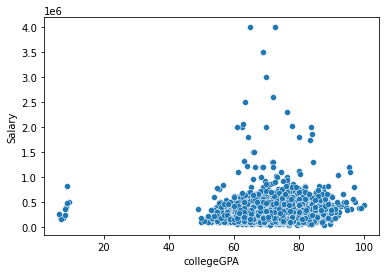

In [16]:
#  we can see how the college CGPA effects the salary of student
sns.scatterplot(x = df['collegeGPA'], y = df['Salary'])

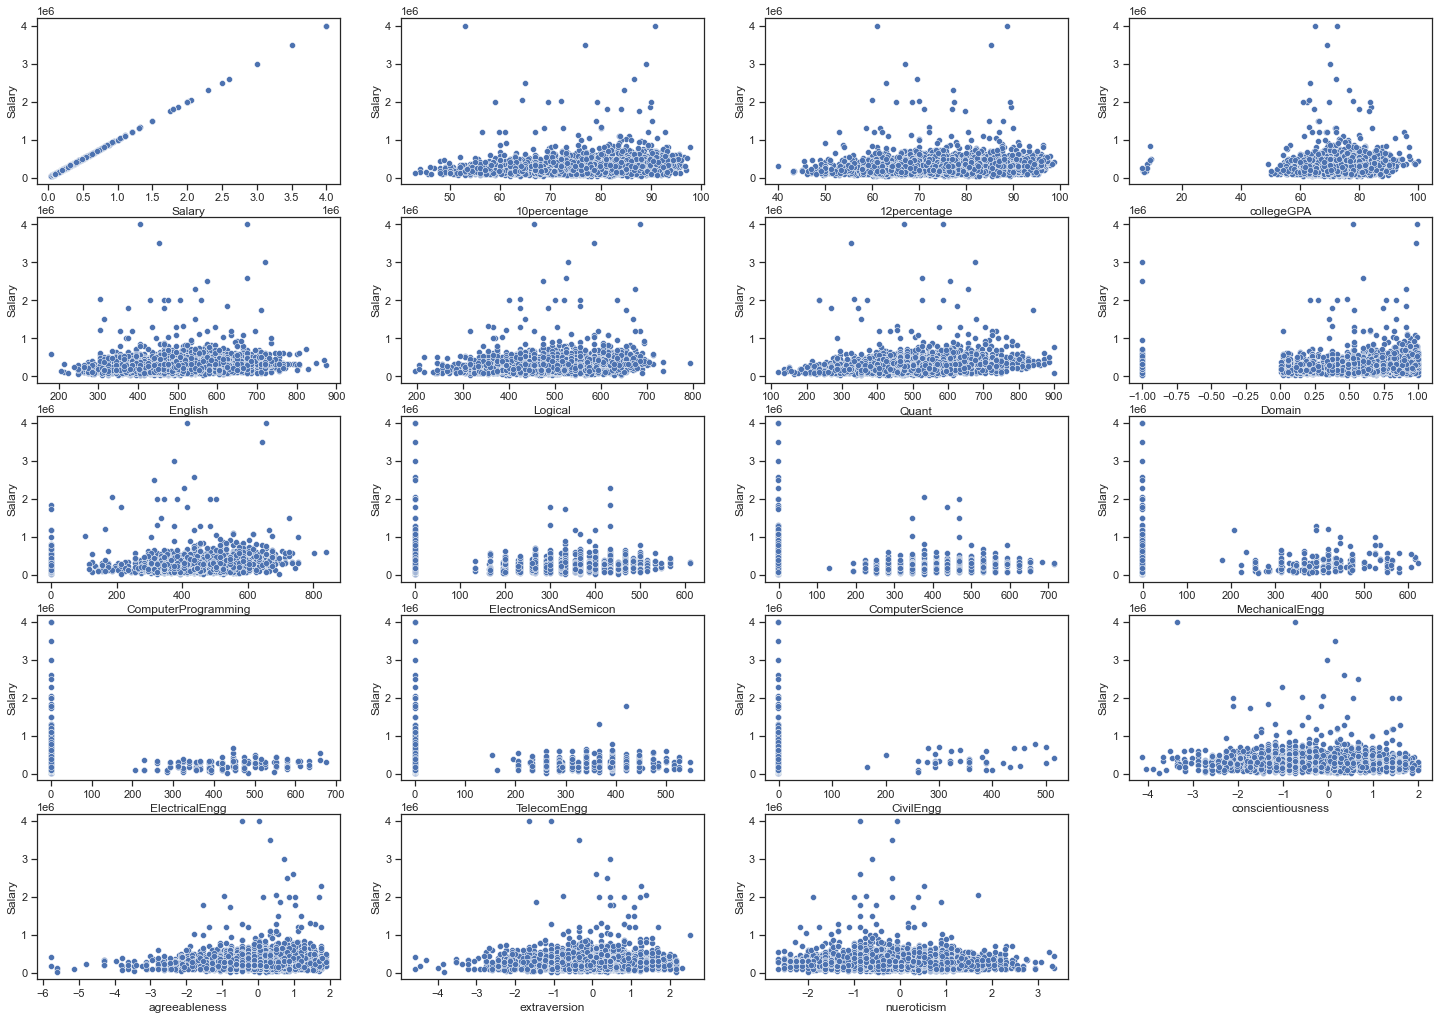

In [59]:
plt.figure(figsize = (25,25))
for i,col in enumerate(num_cols[:-1]):
    plt.subplot(7,4,i+1)
    sns.scatterplot(x = col, y = 'Salary', data = df)
plt.show()

**we can also compare different features of the data in one graph and see their relationship using multivariate analysis**

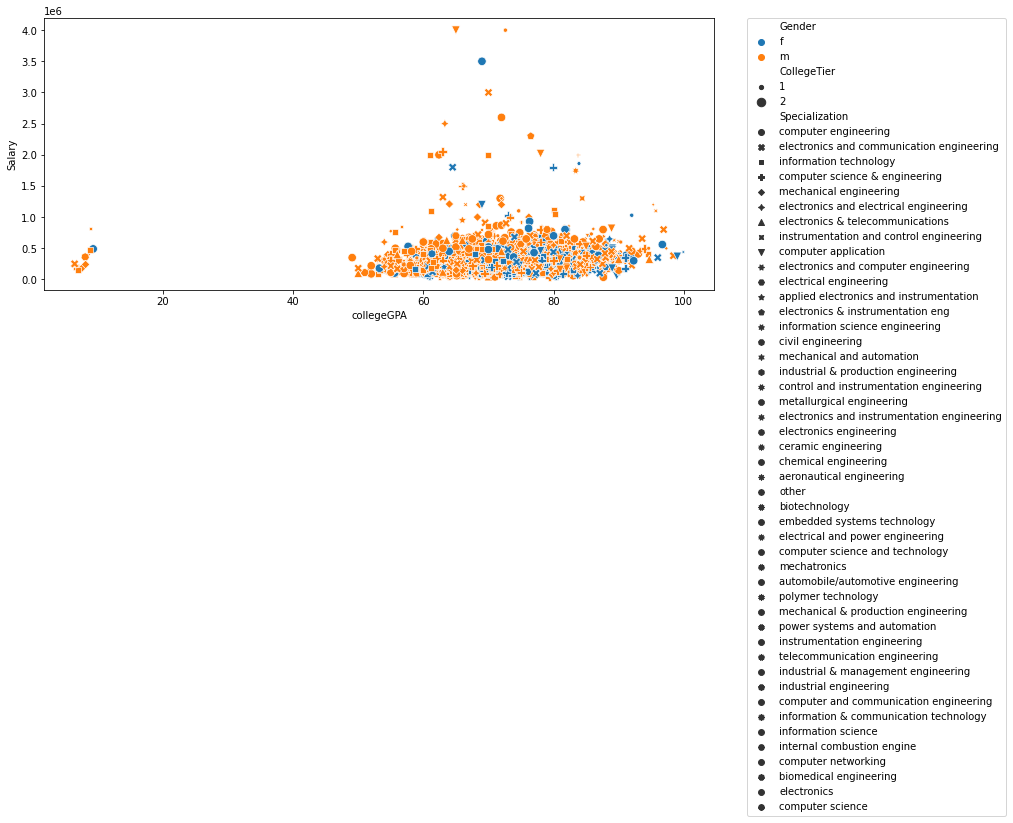

In [20]:

plt.figure(figsize = (12,5))
sns.scatterplot(x = df['collegeGPA'], y = df['Salary'], hue = df["Gender"], style = df['Specialization'], size =df['CollegeTier'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

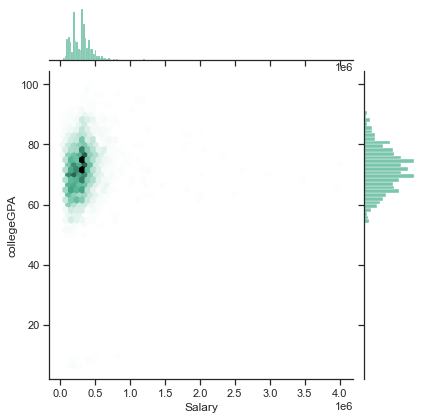

In [21]:
#  we can also visualize the salary and collegegpa in college
sns.set_theme(style="ticks")
sns.jointplot(x=df['Salary'], y=df['collegeGPA'], kind="hex", color="#4CB391")

### Conclusion
* so the college GPA does not effect the salary because we can see in graph 1 that students having GPA greater than 45% are getting selected in the company so the 45% is the benchmark to get selected for the interview process
* The average knowledge of computerProgramming, English and other subjects are required for the selection process
* from the multivariate analysis we can see that there is no Gender effect on selection by that much and most of the selected candidates are from the domain of computer engineering, electronics and communication engineering and very few people are having salary greater than 10lpa 

### Barplot  and boxplot(numerical vs categorical )
in this plot we can get insights of how categorical column effect the numerical column

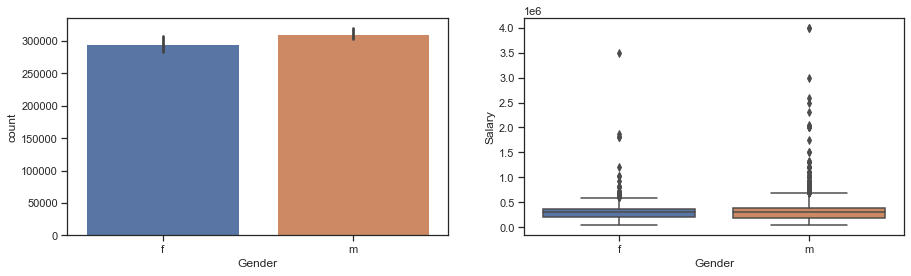

In [22]:
# Gender vs Salary
plt.figure(figsize = (15, 4))
plt.subplot(1, 2, 1)
sns.barplot(x = df['Gender'], y = df['Salary'])
plt.ylabel('count')
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Gender'], y = df['Salary'])
plt.show()

There is not much difference of pay sclae of male from female. So we can say they are paid almost equally

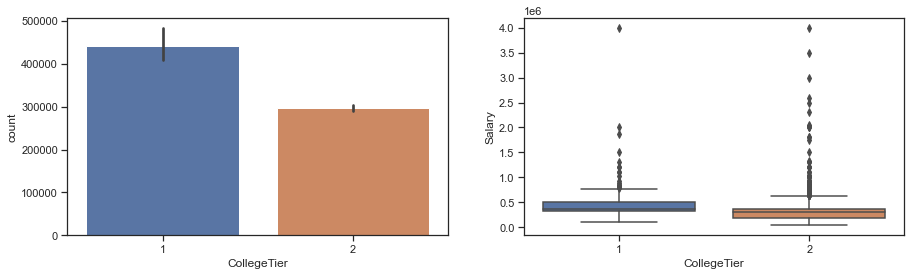

In [23]:
# CollegeTier vs Salary
plt.figure(figsize = (15, 4))
plt.subplot(1, 2, 1)
sns.barplot(x = df['CollegeTier'], y = df['Salary'])
plt.ylabel('count')
plt.subplot(1, 2, 2)
sns.boxplot(x=df['CollegeTier'], y = df['Salary'])
plt.show()


There is a clear visualization that students studying in CollegeTier 1 are paid higher that CollegeTier 2

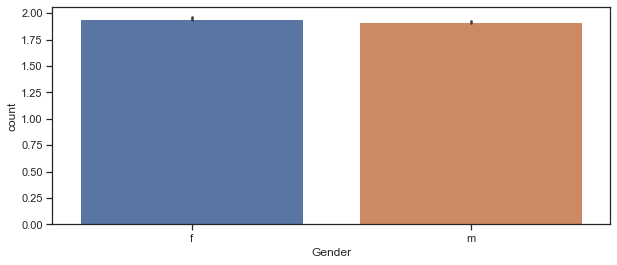

In [24]:
# See the male to female ration in college tier
plt.figure(figsize = (10, 4))
sns.barplot(x = df['Gender'], y = df['CollegeTier'])
plt.ylabel('count')
plt.show()


so there is not much differnce in the male and female ratio in the colleges 

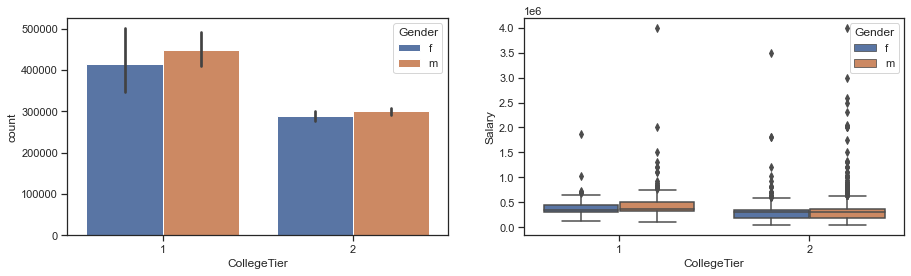

In [25]:
#  we can also get teh following conclusion from multi variate plot
plt.figure(figsize = (15, 4))
plt.subplot(1, 2, 1)
sns.barplot(x = df['CollegeTier'], y = df['Salary'], hue = df['Gender'])
plt.ylabel('count')
plt.subplot(1, 2, 2)
sns.boxplot(x = df['CollegeTier'], y = df['Salary'], hue = df['Gender'])
plt.show()


* we can also see that the outliers are in both male and female but the outliers in male are larger as compare to outliers in female

<AxesSubplot:xlabel='12graduation', ylabel='Salary'>

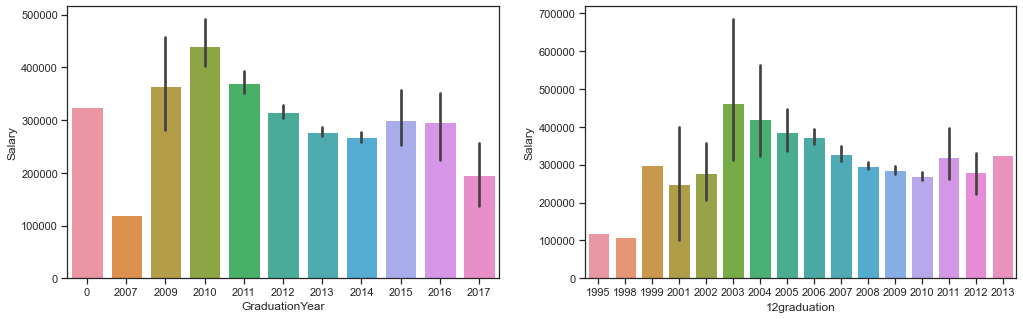

In [27]:
plt.figure(figsize = (17,5))
plt.subplot(1,2,1)
sns.barplot(data = df , x = 'GraduationYear',y = 'Salary')
plt.subplot(1,2,2)
sns.barplot(data = df , x = '12graduation',y = 'Salary')

<AxesSubplot:xlabel='Salary', ylabel='Specialization'>

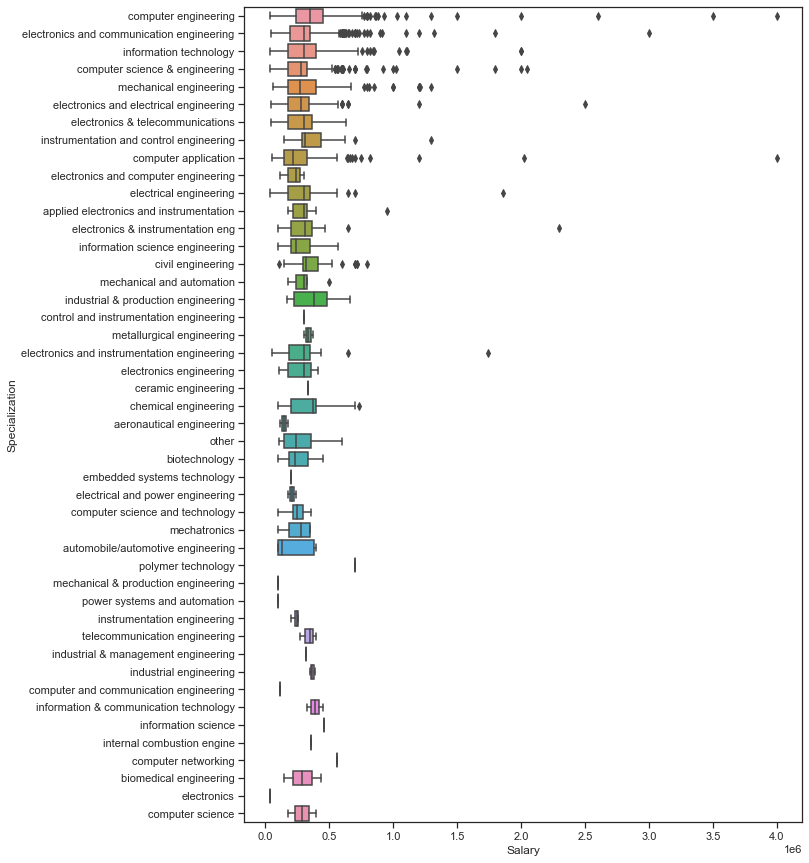

In [29]:
plt.figure(figsize = (10,15))
sns.boxplot(y = 'Specialization',x = 'Salary',data = df)

### Distribution  plot

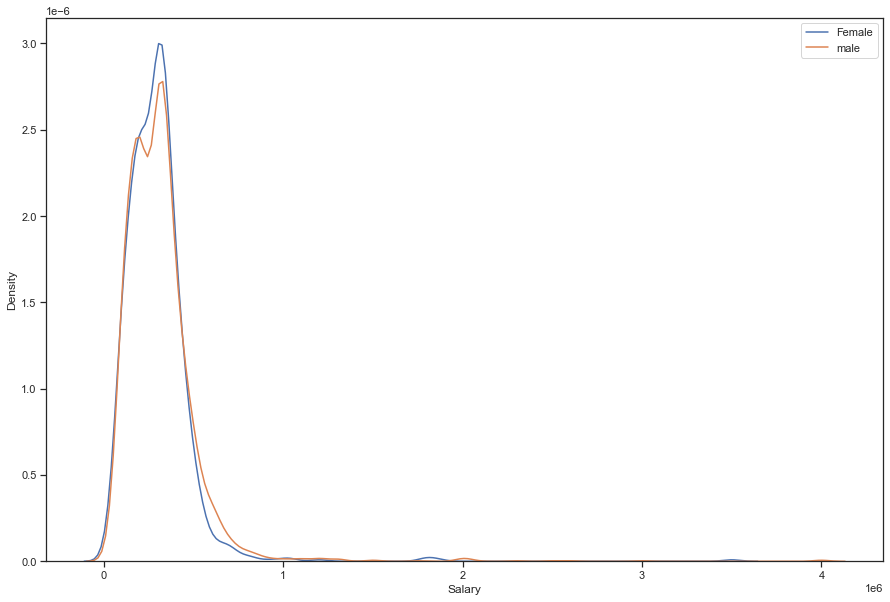

In [27]:
plt.figure(figsize = (15, 10))
sns.distplot(df[df['Gender']=='f']['Salary'], kde = True, hist = False, label = "Female")
sns.distplot(df[df['Gender']=='m']['Salary'], kde = True, hist = False, label = "male")
plt.legend()

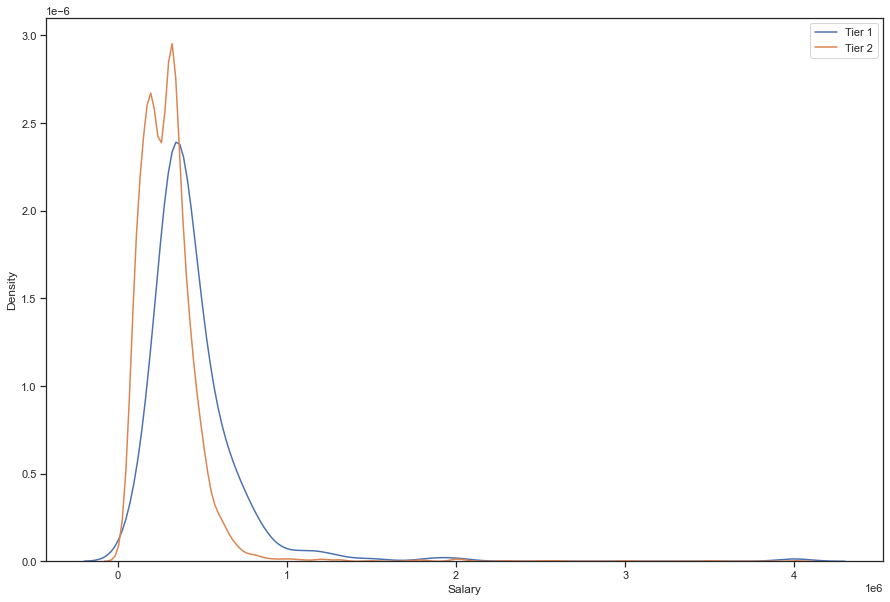

In [28]:
plt.figure(figsize = (15, 10))
sns.distplot(df[df['CollegeTier']== 1]['Salary'], kde = True, hist = False, label = "Tier 1")
sns.distplot(df[df['CollegeTier']== 2]['Salary'], kde = True, hist = False, label = "Tier 2")
plt.legend();

*  the female having salary in between 2lpa to 5lpa are more than male and from 8lpa to 10lpa male students are getting selected more and for erst of salary range the selection process is equal
* the students from tier 1 colleges are more than that of tier 2 colleges. from salary range of 1lpa to 5lpa the tier 2 are getting selected more and from 5lpa to almost 15lakh tier 1 students are more

<AxesSubplot:xlabel='Gender', ylabel='Salary'>

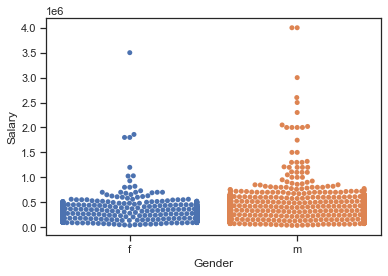

In [29]:
sns.swarmplot(x = df['Gender'], y = df['Salary'])

<AxesSubplot:xlabel='Gender', ylabel='Salary'>

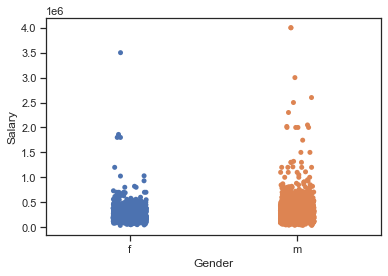

In [30]:
sns.stripplot(x = df['Gender'], y = df['Salary'])

<AxesSubplot:xlabel='CollegeTier', ylabel='Salary'>

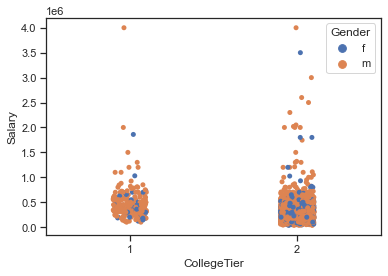

In [31]:
sns.stripplot(x = df['CollegeTier'], y = df['Salary'], hue = df['Gender'])

### ClusterMap Plot (categorical vs categorical)

In [32]:
pd.crosstab(df['Gender'], df['CollegeTier'])

CollegeTier,1,2
Gender,,
f,51,906
m,246,2795


* so we can see that there is a clear gap between the female and male in the college Tier is 51:246 is ration for Tier 1 and 906:2795 is for Tier2

we can see the closeness between the values in cluster map

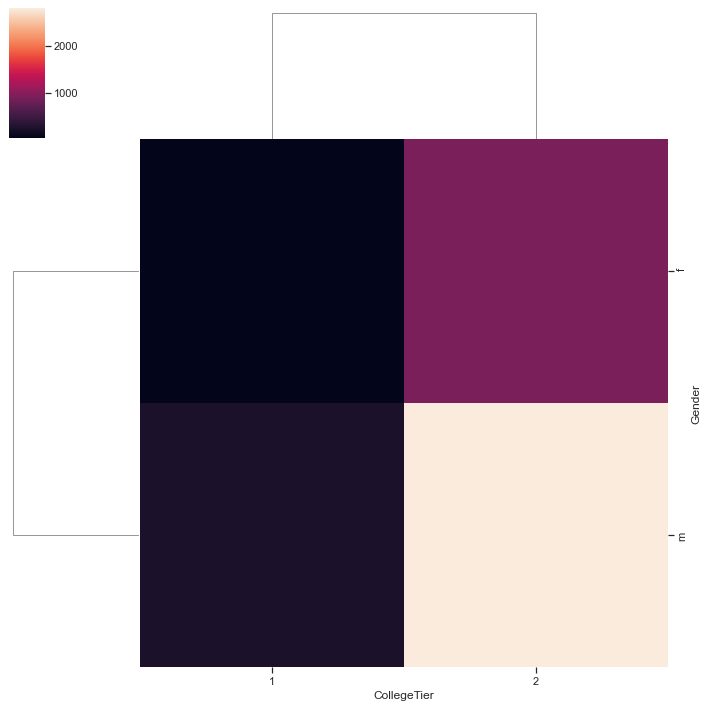

In [33]:
sns.clustermap(pd.crosstab(df['Gender'], df['CollegeTier']))

as the color of the box are very distinct we can say the number of female and male are not equal in collges and male are more

<AxesSubplot:xlabel='CollegeTier', ylabel='Gender'>

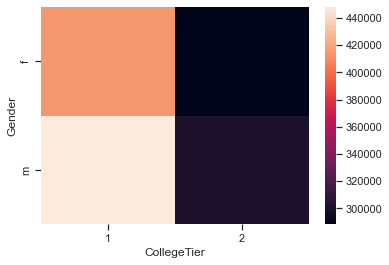

In [34]:
# the same above results can be seen in heatmap and we can also add salary of each 
sns.heatmap(df.pivot_table(values = 'Salary', index = 'Gender', columns = 'CollegeTier'))

<AxesSubplot:>

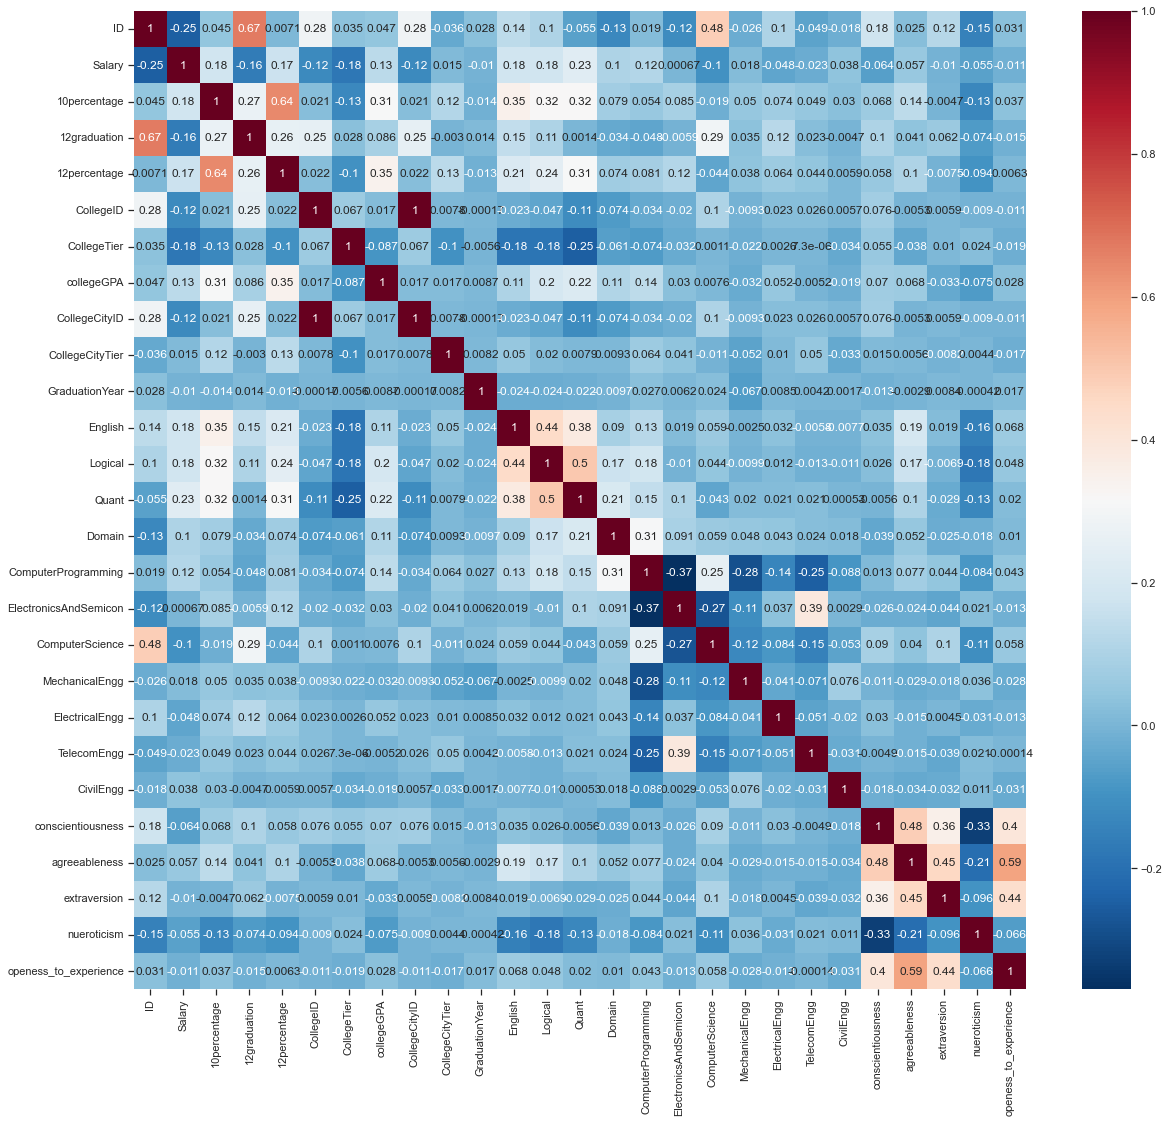

In [42]:
plt.figure(figsize = (20,18))
sns.heatmap(df.corr(), data = df, annot = True, cmap = 'RdBu_r')

# Hypothesis Testing
>-	Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” Test this claim with the data given to you.

In [35]:
list_of_values = ['programmer analyst', 'software engineer', 'hardware engineer','associate engineer']
# copy the existing df and remve all the rows except having the required attributes i.e Specialization == computer engineering and Designation in list of values

df_test_1 = df.copy()

df_test_1 = df_test_1.loc[(df_test_1['Specialization'] == 'computer engineering') & (df_test_1['Designation'].isin(list_of_values))]

In [36]:
df_test_1

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
19,466888,325000,2014-09-01,present,software engineer,Pune,f,1990-11-30,79.00,cbse,...,-1,-1,-1,-1,-1,0.8192,0.2668,-0.2714,-0.4078,-0.1295
20,140069,320000,2010-11-01,2012-09-01 00:00:00,software engineer,Bangalore,f,1988-07-25,91.20,karnataka secondary school of examination,...,-1,-1,-1,-1,-1,-0.1082,0.9688,0.5269,-0.2902,0.3444
36,602377,270000,2013-03-01,present,software engineer,Hyderabad,f,1992-08-21,91.50,state board,...,-1,-1,-1,-1,-1,-1.0208,0.2124,0.4711,0.2727,-0.0943
44,247617,380000,2012-05-01,2015-04-01 00:00:00,programmer analyst,Bangalore,f,1989-01-06,84.50,0,...,-1,-1,-1,-1,-1,0.5100,0.6568,-0.6343,0.2973,0.1864
59,536053,120000,2009-09-01,2013-04-01 00:00:00,software engineer,Bangalore,m,1977-10-30,72.00,cbse,...,-1,366,-1,-1,400,-0.3014,-0.4353,-0.9245,-0.3490,-0.4455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3898,272323,390000,2012-08-01,present,software engineer,Noida,f,1989-08-24,81.20,cbse,...,-1,-1,-1,-1,-1,0.5100,1.1248,0.5269,-0.7603,0.6603
3944,423045,410000,2012-05-01,2015-04-01 00:00:00,software engineer,Noida,m,1989-08-03,91.30,icse,...,-1,-1,-1,-1,-1,1.2828,1.7878,-0.3803,0.1798,0.3444
3968,469012,360000,2013-05-01,2015-01-01 00:00:00,software engineer,Bangalore,f,1990-09-30,81.00,cbse,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,0.6204,0.3444
3979,212055,550000,2013-07-01,2014-04-01 00:00:00,software engineer,Bangalore,m,1989-07-22,69.16,up board,...,-1,-1,-1,-1,-1,-0.5719,0.5008,-0.4891,0.4148,-1.2354


In [37]:
# Make a new dataframe with only 3 columns(salary, Designation, Specialization)
df_test_1 = df_test_1[['Specialization','Designation', 'Salary']]

In [38]:
df_test_1

,Specialization,Designation,Salary
19,computer engineering,software engineer,325000
20,computer engineering,software engineer,320000
36,computer engineering,software engineer,270000
44,computer engineering,programmer analyst,380000
59,computer engineering,software engineer,120000
...,...,...,...
3898,computer engineering,software engineer,390000
3944,computer engineering,software engineer,410000
3968,computer engineering,software engineer,360000
3979,computer engineering,software engineer,550000


In [39]:
df_test_1['Designation'].value_counts()

software engineer     108
programmer analyst     26
associate engineer      1
Name: Designation, dtype: int64

<AxesSubplot:xlabel='Designation', ylabel='Salary'>

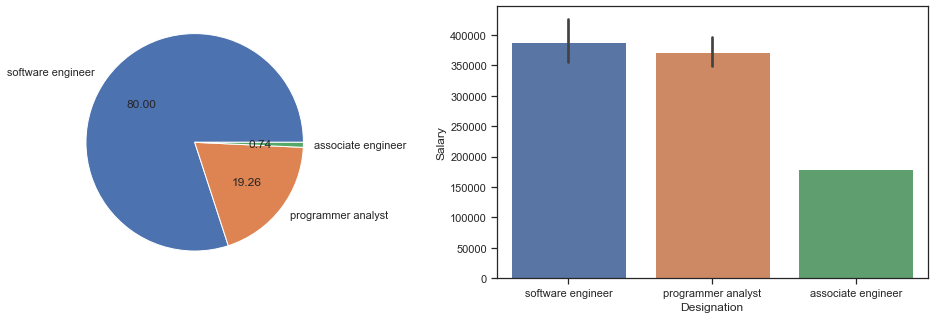

In [40]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (17, 5))
ax1.pie(x = df_test_1['Designation'].value_counts(), autopct = '%.2f', labels =['software engineer ', 'programmer analyst', 'associate engineer'] );
sns.barplot(df_test_1['Designation'], df_test_1['Salary'])

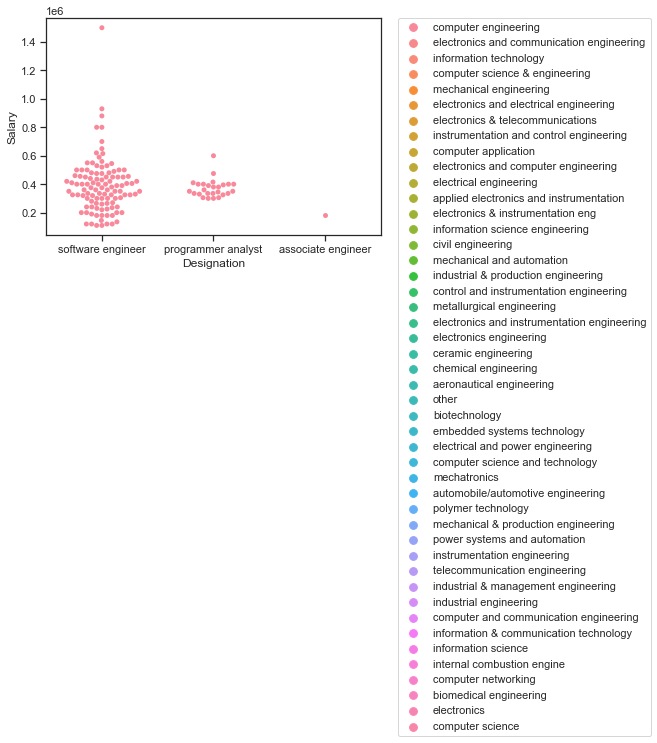

In [41]:
sns.swarmplot(df_test_1['Designation'], df['Salary'], hue = df['Specialization'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [42]:
#randomly select sample
df_test_1_sample = df_test_1.sample(n = 20)

In [43]:
df_test_1_sample

,Specialization,Designation,Salary
2752,computer engineering,software engineer,135000
711,computer engineering,programmer analyst,345000
1009,computer engineering,software engineer,450000
930,computer engineering,software engineer,430000
2003,computer engineering,software engineer,325000
2188,computer engineering,software engineer,120000
740,computer engineering,programmer analyst,305000
3285,computer engineering,software engineer,455000
3883,computer engineering,software engineer,335000
2048,computer engineering,software engineer,330000


In [44]:
df['Salary'].std()

212737.4999568574

In [45]:
(250000+300000)/2

275000.0

In [46]:
df_test_1_sample['Salary'].mean()

355750.0

In [47]:
# Defining the sample and population parameters

sample_size = 20
sample_mean = 349500.0
pop_mean = 275000.0
pop_std = 212737.4999568574

In [48]:
def z_score(sample_size, sample_mean, pop_mean, pop_std):
    numerator = sample_mean - pop_mean
    denomenator = pop_std / sample_size**0.5
    return numerator / denomenator

In [49]:
z = z_score(sample_size, sample_mean, pop_mean, pop_std)
print(z)

1.5661278745638898


Deciding weather to choose a 2 or 1 tail test 
as we have been giving salary ranges between 2.5 to 3k thus if H(a) to be correct we have to get salary either greater or less than 2.5k to 3k  thus we have to perform 2 tail test,

Detailed description about the norm.ppf
[norm.ppf](https://stackoverflow.com/questions/60699836/how-to-use-norm-ppf)

In [50]:
# Two Tail - Calculating the z-critical value

confidence_level = 0.95

alpha = 1 - confidence_level # Threshold value

z_critical = norm.ppf(1 - alpha/2) # Two tailed Z score for 95% Confidence Level

print(z_critical)

1.959963984540054


Text(349500.0, 0.0007, 'x_bar')

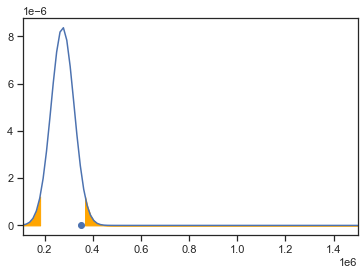

In [51]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = df_test_1['Salary'].min()
x_max = df_test_1['Salary'].max()


# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = pop_std / sample_size**0.5


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the left and right critical values (Two tailed Test)
z_critical_left = pop_mean + (-z_critical * std)
z_critical_right = pop_mean + (z_critical * std)


# Shading the left rejection region
x1 = np.linspace(x_min, z_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')


# Shading the right rejection region
x2 = np.linspace(z_critical_right, x_max, 100)
y2 = norm.pdf(x2, mean, std)
plt.fill_between(x2, y2, color='orange')


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.0007))


# In this case sample does not mean falls in the rejection region
# i.e. here we accept the Null Hypothesis and reject the alternate Hypothesis

In [52]:
if(z < -z_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


###	Is there a relationship between gender and specialisation? (i.e. Does the preference of Specialisation depend on the Gender?)
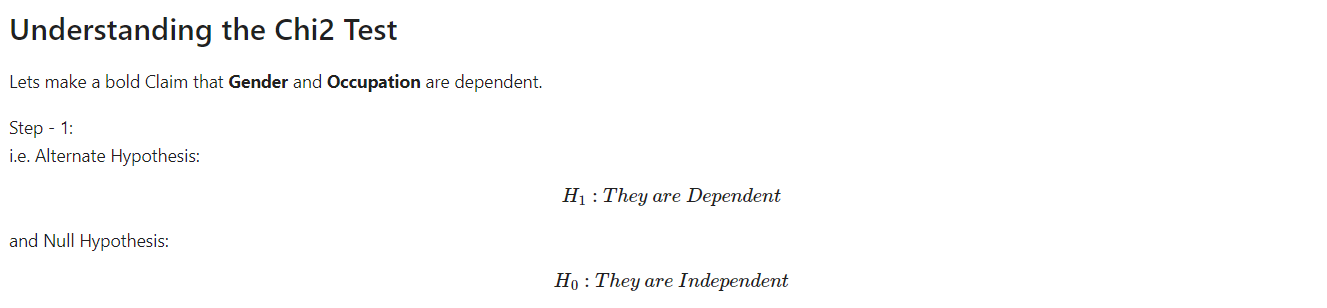

In [53]:
df_test_2 = df.copy()
pd.crosstab( df_test_2['Specialization'], df_test_2['Gender'], margins=True)

Gender,f,m,All
Specialization,,,
aeronautical engineering,1,2,3
applied electronics and instrumentation,2,7,9
automobile/automotive engineering,0,5,5
biomedical engineering,2,0,2
biotechnology,9,6,15
ceramic engineering,0,1,1
chemical engineering,1,8,9
civil engineering,6,23,29
computer and communication engineering,0,1,1


In [54]:
# Observed Frequency
observed = pd.crosstab( df_test_2['Specialization'], df_test_2['Gender'])
observed

Gender,f,m
Specialization,,
aeronautical engineering,1,2
applied electronics and instrumentation,2,7
automobile/automotive engineering,0,5
biomedical engineering,2,0
biotechnology,9,6
ceramic engineering,0,1
chemical engineering,1,8
civil engineering,6,23
computer and communication engineering,0,1


In [55]:
# chi2_contigency returns chi2 test statistic, p-value, degree of freedoms, expected frequencies
chi2_contingency(observed)

(104.46891913608454,
 1.2453868176977011e-06,
 45,
 array([[7.18109055e-01, 2.28189095e+00],
        [2.15432716e+00, 6.84567284e+00],
        [1.19684842e+00, 3.80315158e+00],
        [4.78739370e-01, 1.52126063e+00],
        [3.59054527e+00, 1.14094547e+01],
        [2.39369685e-01, 7.60630315e-01],
        [2.15432716e+00, 6.84567284e+00],
        [6.94172086e+00, 2.20582791e+01],
        [2.39369685e-01, 7.60630315e-01],
        [5.84062031e+01, 1.85593797e+02],
        [1.43621811e+02, 4.56378189e+02],
        [2.39369685e-01, 7.60630315e-01],
        [4.78739370e-01, 1.52126063e+00],
        [1.78091046e+02, 5.65908954e+02],
        [1.43621811e+00, 4.56378189e+00],
        [2.39369685e-01, 7.60630315e-01],
        [4.78739370e-01, 1.52126063e+00],
        [1.96283142e+01, 6.23716858e+01],
        [2.39369685e-01, 7.60630315e-01],
        [7.65982991e+00, 2.43401701e+01],
        [2.89637319e+01, 9.20362681e+01],
        [2.10645323e+02, 6.69354677e+02],
        [7.18109055e-01, 

In [56]:
# Computing chi2 test statistic, p-value, degree of freedoms individually and storing the

chi2_test_stat = chi2_contingency(observed)[0]
pval = chi2_contingency(observed)[1]
dof = chi2_contingency(observed)[2]
chi2_test_stat,pval, dof

(104.46891913608454, 1.2453868176977011e-06, 45)

In [61]:
confidence_level = 0.90

alpha = 1 - confidence_level

chi2_critical = chi2.ppf(1 - alpha, dof)

chi2_critical

57.50530474499599

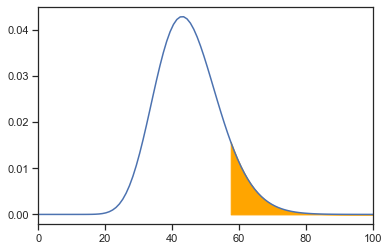

In [62]:
# Ploting the chi2 distribution to visualise

# Defining the x minimum and x maximum
x_min = 0
x_max = 100

# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = chi2.pdf(x, dof)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Setting Chi2 Critical value 
chi2_critical_right = chi2_critical

# Shading the right rejection region
x1 = np.linspace(chi2_critical_right, x_max, 100)
y1 = chi2.pdf(x1, dof)
plt.fill_between(x1, y1, color='orange')

In [63]:
if(chi2_test_stat > chi2_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

Reject Null Hypothesis


**so we can say the the null hypothesis(that they are independent) is rejected and we can say they are related**

In [64]:
df.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [65]:
for col in df.columns:
    print(df[col].value_counts())

203097     1
283847     1
1118955    1
327371     1
587792     1
          ..
355018     1
806160     1
102065     1
462964     1
324966     1
Name: ID, Length: 3998, dtype: int64
300000     293
180000     239
200000     205
325000     188
120000     165
          ... 
2050000      1
144000       1
1320000      1
755000       1
925000       1
Name: Salary, Length: 177, dtype: int64
2014-07-01    199
2014-06-01    180
2014-08-01    178
2014-09-01    142
2014-01-01    142
             ... 
2015-11-01      1
2009-11-01      1
2004-08-01      1
2009-09-01      1
2007-02-01      1
Name: DOJ, Length: 81, dtype: int64
present                1875
2015-04-01 00:00:00     573
2015-03-01 00:00:00     124
2015-05-01 00:00:00     112
2015-01-01 00:00:00      99
                       ... 
2005-03-01 00:00:00       1
2015-10-01 00:00:00       1
2010-02-01 00:00:00       1
2011-02-01 00:00:00       1
2010-10-01 00:00:00       1
Name: DOL, Length: 67, dtype: int64
software engineer                    

In [66]:
df = df[df["10board"] !=0] # remove the rows with board = 0
df = df[df['JobCity'] != -1] # remove the rows with city = -1
df = df[df["12board"] !=0] # remove the rows with board = 0


In [67]:
for col in df.columns:
    print(df[col].value_counts())

203097     1
415282     1
707108     1
322657     1
108902     1
          ..
947943     1
1118011    1
914336     1
675621     1
324966     1
Name: ID, Length: 3190, dtype: int64
300000     251
180000     193
325000     166
200000     156
120000     134
          ... 
645000       1
515000       1
580000       1
2300000      1
925000       1
Name: Salary, Length: 165, dtype: int64
2014-07-01    177
2014-08-01    156
2014-06-01    155
2014-09-01    129
2014-01-01    116
             ... 
2015-12-01      1
2015-11-01      1
2008-11-01      1
2009-09-01      1
2007-06-01      1
Name: DOJ, Length: 78, dtype: int64
present                1530
2015-04-01 00:00:00     464
2015-05-01 00:00:00     100
2015-03-01 00:00:00      90
2015-01-01 00:00:00      72
                       ... 
2015-10-01 00:00:00       1
2011-10-01 00:00:00       1
2010-02-01 00:00:00       1
2011-02-01 00:00:00       1
2010-10-01 00:00:00       1
Name: DOL, Length: 65, dtype: int64
software engineer                 451

In [68]:
# Indentifying the Input and the Output
#  we can say depending on the students data how much is the salary they get?
df["CollegeCityTier"] = df['CollegeCityTier'].astype(object)
df["CollegeTier"] = df['CollegeTier'].astype(object)
y = df['Salary']
x = df.drop('Salary', axis = 1)

**we can also split the data but here we are not created a models so i will be doing trnansformation with all data**

In [69]:
# from sklearn.model_selection import train_test_split
# X_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state = 100)

In [70]:
x_cat = x.select_dtypes(include=['object'])
x_cat = x_cat.drop('DOL', axis =1) # remove columns with date and time
x_cat

,Designation,JobCity,Gender,10board,12board,CollegeTier,Degree,Specialization,CollegeCityTier,CollegeState
0,senior quality engineer,Bangalore,f,"board ofsecondary education,ap","board of intermediate education,ap",2,B.Tech/B.E.,computer engineering,0,Andhra Pradesh
1,assistant manager,Indore,m,cbse,cbse,2,B.Tech/B.E.,electronics and communication engineering,0,Madhya Pradesh
2,systems engineer,Chennai,f,cbse,cbse,2,B.Tech/B.E.,information technology,0,Uttar Pradesh
3,senior software engineer,Gurgaon,m,cbse,cbse,1,B.Tech/B.E.,computer engineering,1,Delhi
4,get,Manesar,m,cbse,cbse,2,B.Tech/B.E.,electronics and communication engineering,0,Uttar Pradesh
...,...,...,...,...,...,...,...,...,...,...
3993,software engineer,New Delhi,m,cbse,cbse,2,B.Tech/B.E.,information technology,0,Haryana
3994,technical writer,Hyderabad,f,state board,state board,2,B.Tech/B.E.,electronics and communication engineering,1,Telangana
3995,associate software engineer,Bangalore,m,"bse,odisha","chse,odisha",2,B.Tech/B.E.,computer engineering,0,Orissa
3996,software developer,Asifabadbanglore,f,state board,state board,2,B.Tech/B.E.,computer science & engineering,1,Karnataka


In [71]:
x_num = x.select_dtypes(include=['int64', 'float64'])

x_num

,ID,10percentage,12graduation,12percentage,CollegeID,collegeGPA,CollegeCityID,GraduationYear,English,Logical,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,84.30,2007,95.80,1141,78.00,1141,2011,515,585,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,85.40,2007,85.00,5807,70.06,5807,2012,695,610,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,85.00,2010,68.20,64,70.00,64,2014,615,545,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,85.60,2007,83.60,6920,74.64,6920,2011,635,585,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,78.00,2008,76.80,11368,73.90,11368,2012,545,625,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,47916,52.09,2006,55.50,6268,61.50,6268,2010,365,334,...,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,752781,90.00,2009,93.00,4883,77.30,4883,2013,415,410,...,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,355888,81.86,2008,65.50,9786,70.00,9786,2012,475,475,...,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,947111,78.72,2010,69.88,979,70.42,979,2014,450,410,...,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


In [72]:
x_cat.head()

,Designation,JobCity,Gender,10board,12board,CollegeTier,Degree,Specialization,CollegeCityTier,CollegeState
0,senior quality engineer,Bangalore,f,"board ofsecondary education,ap","board of intermediate education,ap",2,B.Tech/B.E.,computer engineering,0,Andhra Pradesh
1,assistant manager,Indore,m,cbse,cbse,2,B.Tech/B.E.,electronics and communication engineering,0,Madhya Pradesh
2,systems engineer,Chennai,f,cbse,cbse,2,B.Tech/B.E.,information technology,0,Uttar Pradesh
3,senior software engineer,Gurgaon,m,cbse,cbse,1,B.Tech/B.E.,computer engineering,1,Delhi
4,get,Manesar,m,cbse,cbse,2,B.Tech/B.E.,electronics and communication engineering,0,Uttar Pradesh


In [73]:
x_cat_ohe_df = x_cat[['Designation', 'JobCity', 'Gender', '10board', '12board', 'Degree', 'Specialization', 'CollegeState']]
x_cat_le_df = x_cat[['CollegeTier', 'CollegeCityTier']]

In [74]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)

x_num_rescaled = pd.DataFrame(scaler.fit_transform(x_num), 
                                    columns = x_num.columns, 
                                    index = x_num.index)

x_num_rescaled


,ID,10percentage,12graduation,12percentage,CollegeID,collegeGPA,CollegeCityID,GraduationYear,English,Logical,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,-1.365526,0.643577,-0.762341,1.953139,-0.852035,0.810369,-0.852035,-0.030878,0.114597,0.960684,...,-0.557704,-0.245564,-0.211073,-0.319047,-0.104294,0.963777,0.700966,0.538440,1.533438,-0.294379
1,-0.332342,0.755545,-0.762341,0.964039,0.104203,-0.168949,0.104203,-0.002831,1.831797,1.249614,...,-0.557704,-0.245564,-0.211073,-0.319047,-0.104294,-0.682222,0.245931,1.284440,0.087878,0.966679
2,0.300213,0.714830,1.099257,-0.574562,-1.072752,-0.176350,-1.072752,0.053263,1.068597,0.498395,...,-0.557704,-0.245564,-0.211073,-0.319047,-0.104294,0.287039,1.642811,0.158270,-0.663911,0.782125
3,-1.189082,0.775903,-0.762341,0.835822,0.332298,0.395947,0.332298,-0.030878,1.259397,0.960684,...,-0.557704,-0.245564,-0.211073,-0.319047,-0.104294,0.069719,0.210171,-0.373152,-0.208844,-0.750853
4,-0.980487,0.002303,-0.141808,0.213055,1.243859,0.304676,1.243859,-0.002831,0.400797,1.422973,...,-0.557704,-0.245564,-0.211073,-0.319047,-0.104294,-0.824435,-0.444328,-1.132759,0.284801,0.010001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,-1.791023,-2.635064,-1.382874,-1.737671,0.198679,-1.224738,0.198679,-0.058925,-1.316404,-1.940178,...,-0.557704,-0.245564,-0.211073,-0.319047,-0.104294,-0.079339,0.210171,0.234576,0.836505,-0.750853
3994,0.141674,1.223777,0.478724,1.696706,-0.085159,0.724031,-0.085159,0.025216,-0.839404,-1.061829,...,-0.557704,-0.245564,-0.211073,-0.319047,-0.104294,-0.266866,0.769761,0.962677,0.965000,0.043907
3995,-0.946583,0.395210,-0.141808,-0.821837,0.919648,-0.176350,0.919648,-0.002831,-0.267003,-0.310610,...,-0.557704,-0.245564,-0.211073,-0.319047,-0.104294,-1.495002,-1.753116,-1.588503,-1.108897,-0.598759
3996,0.674515,0.075591,1.099257,-0.420702,-0.885234,-0.124547,-0.885234,0.053263,-0.505503,-1.061829,...,1.866517,-0.245564,-0.211073,-0.319047,-0.104294,-0.128317,-0.103288,-0.485256,-0.162784,0.043907


In [75]:
x_cat_ohe = pd.get_dummies(x_cat_ohe_df)

x_cat_ohe

,Designation_.net developer,Designation_.net web developer,Designation_account executive,Designation_account manager,Designation_administrative support,Designation_android developer,Designation_application developer,Designation_application engineer,Designation_apprentice,Designation_ase,...,CollegeState_Orissa,CollegeState_Punjab,CollegeState_Rajasthan,CollegeState_Sikkim,CollegeState_Tamil Nadu,CollegeState_Telangana,CollegeState_Union Territory,CollegeState_Uttar Pradesh,CollegeState_Uttarakhand,CollegeState_West Bengal
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3995,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
x_cat_le_df['CollegeTier'].value_counts(), x_cat_le_df['CollegeCityTier'].value_counts()


(2    2955
 1     235
 Name: CollegeTier, dtype: int64,
 0    2238
 1     952
 Name: CollegeCityTier, dtype: int64)

In [77]:
x_cat_le_df

,CollegeTier,CollegeCityTier
0,2,0
1,2,0
2,2,0
3,1,1
4,2,0
...,...,...
3993,2,0
3994,2,1
3995,2,0
3996,2,1


In [78]:
x_transformed = pd.concat([x_num_rescaled, x_cat_ohe, x_cat_le_df])

In [79]:
x_transformed

,ID,10percentage,12graduation,12percentage,CollegeID,collegeGPA,CollegeCityID,GraduationYear,English,Logical,...,CollegeState_Rajasthan,CollegeState_Sikkim,CollegeState_Tamil Nadu,CollegeState_Telangana,CollegeState_Union Territory,CollegeState_Uttar Pradesh,CollegeState_Uttarakhand,CollegeState_West Bengal,CollegeTier,CollegeCityTier
0,-1.365526,0.643577,-0.762341,1.953139,-0.852035,0.810369,-0.852035,-0.030878,0.114597,0.960684,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.332342,0.755545,-0.762341,0.964039,0.104203,-0.168949,0.104203,-0.002831,1.831797,1.249614,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.300213,0.714830,1.099257,-0.574562,-1.072752,-0.176350,-1.072752,0.053263,1.068597,0.498395,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-1.189082,0.775903,-0.762341,0.835822,0.332298,0.395947,0.332298,-0.030878,1.259397,0.960684,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-0.980487,0.002303,-0.141808,0.213055,1.243859,0.304676,1.243859,-0.002831,0.400797,1.422973,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0
3994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1
3995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0
3996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1


In [80]:
x_transformed.dropna(how='all', inplace = True)
x_transformed=x_transformed.dropna(subset=['ID'])

In [81]:
x_transformed

,ID,10percentage,12graduation,12percentage,CollegeID,collegeGPA,CollegeCityID,GraduationYear,English,Logical,...,CollegeState_Rajasthan,CollegeState_Sikkim,CollegeState_Tamil Nadu,CollegeState_Telangana,CollegeState_Union Territory,CollegeState_Uttar Pradesh,CollegeState_Uttarakhand,CollegeState_West Bengal,CollegeTier,CollegeCityTier
0,-1.365526,0.643577,-0.762341,1.953139,-0.852035,0.810369,-0.852035,-0.030878,0.114597,0.960684,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.332342,0.755545,-0.762341,0.964039,0.104203,-0.168949,0.104203,-0.002831,1.831797,1.249614,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.300213,0.714830,1.099257,-0.574562,-1.072752,-0.176350,-1.072752,0.053263,1.068597,0.498395,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-1.189082,0.775903,-0.762341,0.835822,0.332298,0.395947,0.332298,-0.030878,1.259397,0.960684,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-0.980487,0.002303,-0.141808,0.213055,1.243859,0.304676,1.243859,-0.002831,0.400797,1.422973,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,-1.791023,-2.635064,-1.382874,-1.737671,0.198679,-1.224738,0.198679,-0.058925,-1.316404,-1.940178,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3994,0.141674,1.223777,0.478724,1.696706,-0.085159,0.724031,-0.085159,0.025216,-0.839404,-1.061829,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3995,-0.946583,0.395210,-0.141808,-0.821837,0.919648,-0.176350,0.919648,-0.002831,-0.267003,-0.310610,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3996,0.674515,0.075591,1.099257,-0.420702,-0.885234,-0.124547,-0.885234,0.053263,-0.505503,-1.061829,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Conclusion/Research Question:
1. Is there any relation between the Gender and the Salary? read the article regarding the same question [refer](https://content.timesjobs.com/52-of-women-it-professionals-say-they-get-30-less-salary-than-their-male-colleagues-for-the-same-jobtimesjobs/articleshow/74883512.cms)
